In [1]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [5]:
import numpy as np

In [279]:
x=np.linspace(0,5,200)
y=x**2

In [11]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [13]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

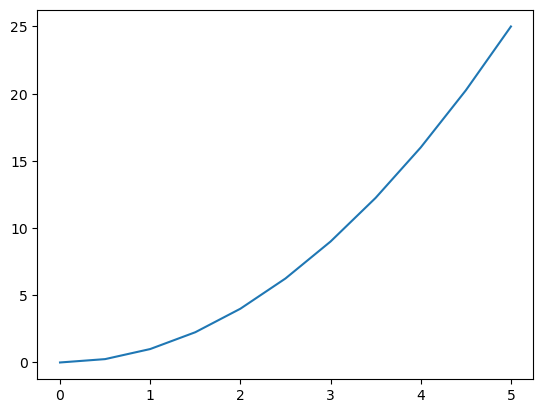

In [21]:
plt.plot(x,y)
plt.show()

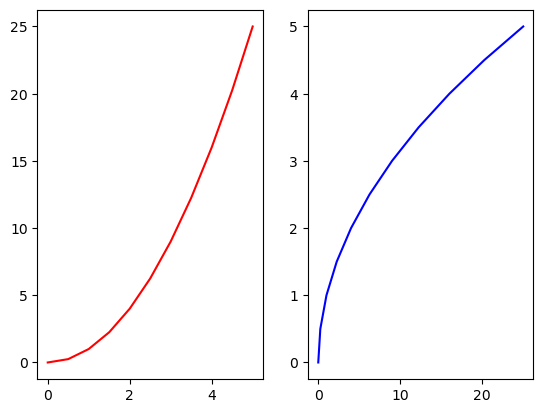

In [35]:
plt.subplot(1,2,1)
plt.plot(x,y,'r')

plt.subplot(1,2,2)
plt.plot(y,x,'b')

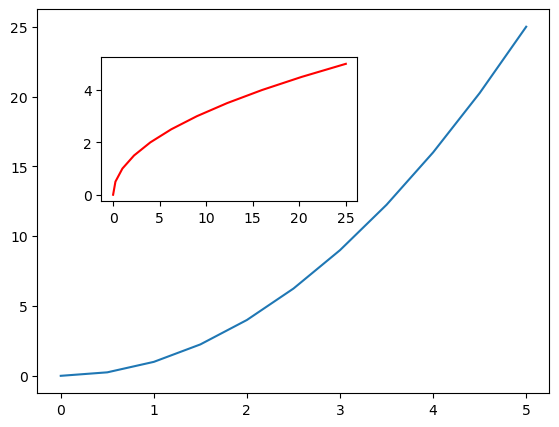

In [95]:
fig = plt.figure()
axes1= fig.add_axes([0.1,0.1,0.8,0.8])
axes2= fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(x,y)
axes2.plot(y,x,'r')

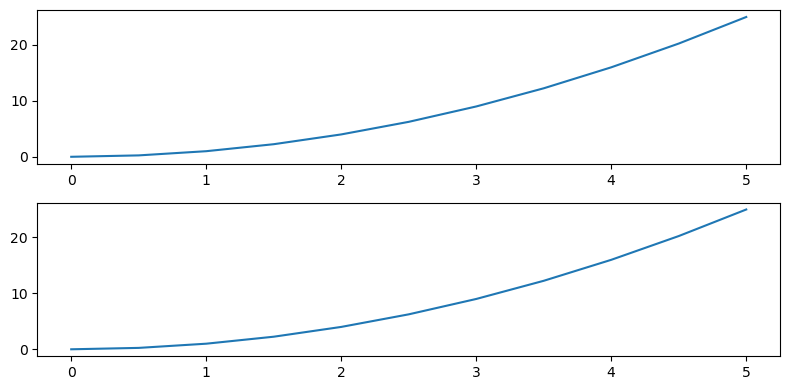

In [149]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,4))
axes[0].plot(x,y)
axes[1].plot(x,y)
plt.tight_layout()

In [151]:
fig.savefig('plot.png')

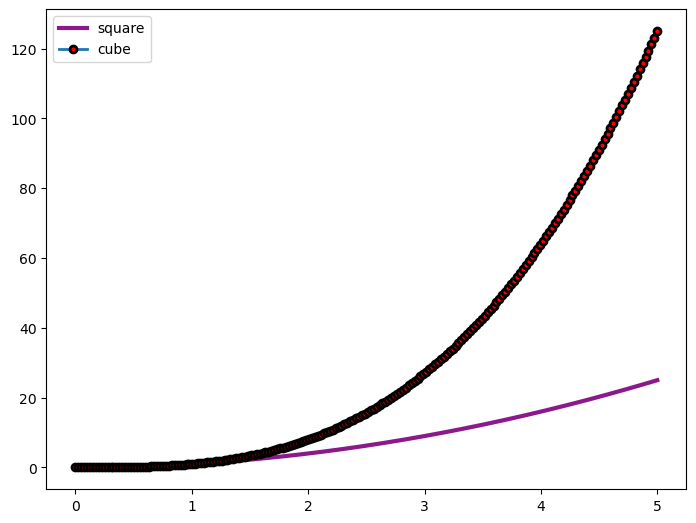

In [281]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label='square',color='purple',linewidth=3,alpha=0.9)
ax.plot(x,x**3,label='cube',linewidth=2,marker='o',markersize=5,markerfacecolor='red',markeredgecolor='black',markeredgewidth=2)
ax.legend(loc=0)

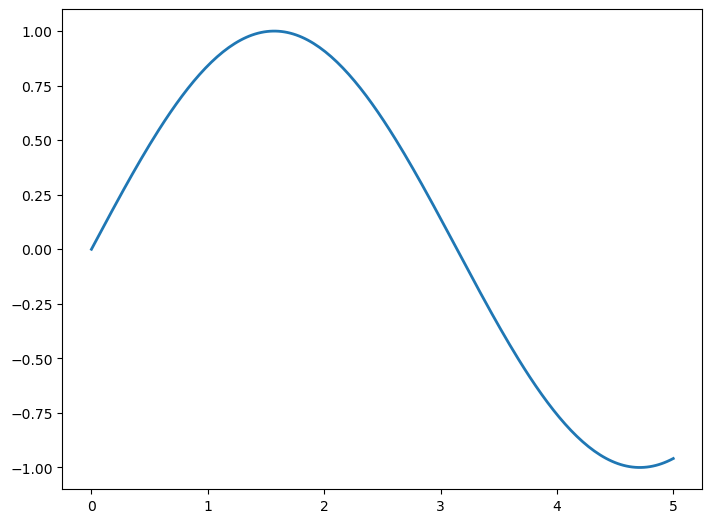

In [283]:
fig = plt.figure()
ax=fig.add_axes([0.1,0.1,1,1])
y=np.sin(x)
ax.plot(x,y,lw=2,ls='-')


In [18]:
import seaborn as sns
%matplotlib inline
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [30]:
cars=sns.load_dataset('tips')

In [32]:
cars.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


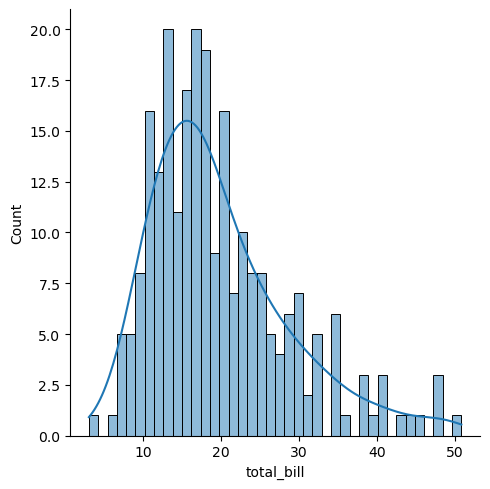

In [40]:
sns.displot(tips['total_bill'],kde=True,bins=40)

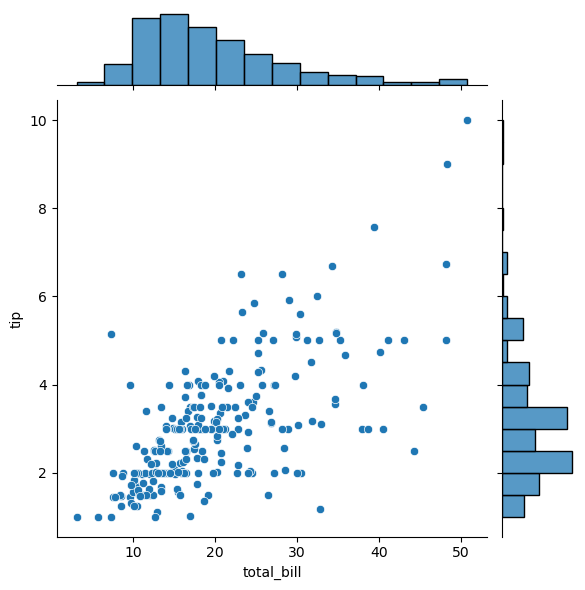

In [50]:
sns.jointplot(x='total_bill',y='tip',data=tips)

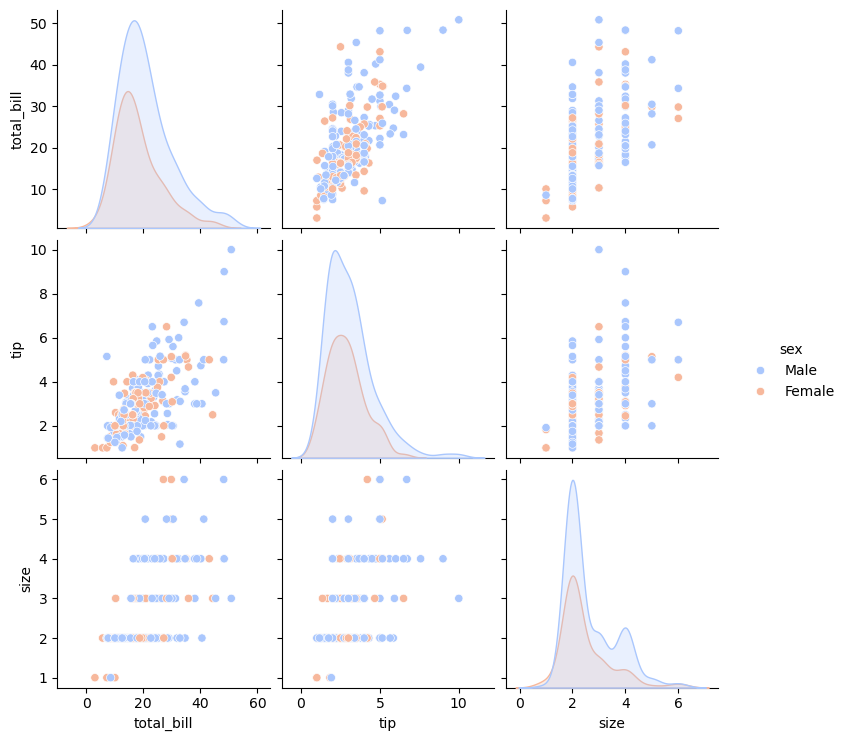

In [56]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<Axes: xlabel='total_bill'>

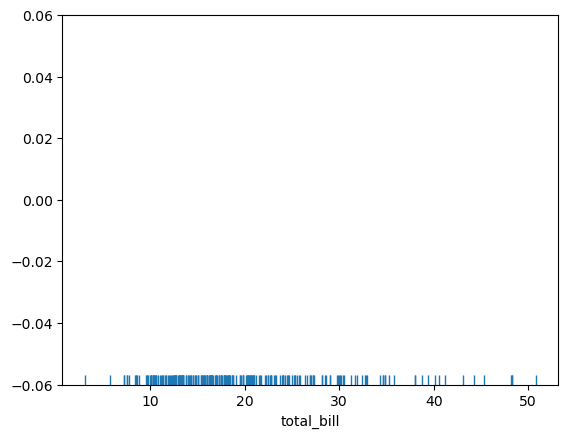

In [64]:
sns.rugplot(tips['total_bill'])

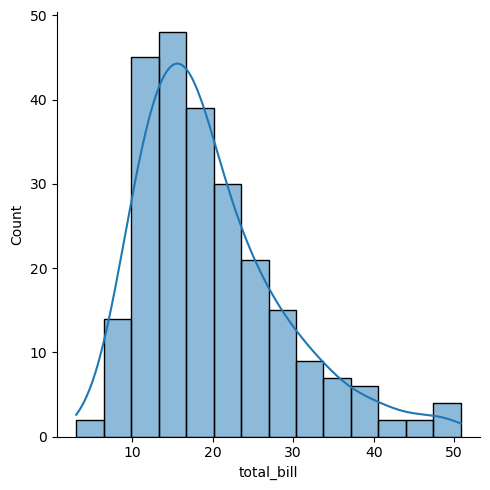

In [66]:
sns.displot(data=tips['total_bill'],kde=True)

(0.0, 1.0)

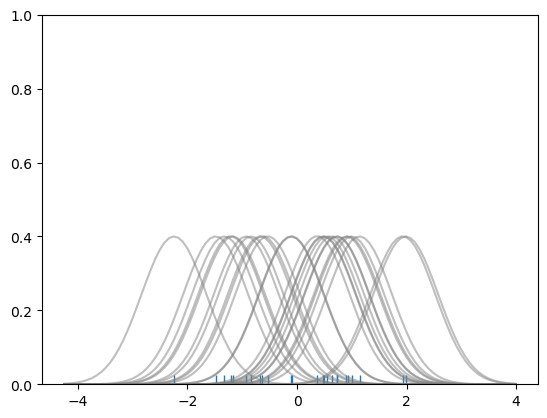

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

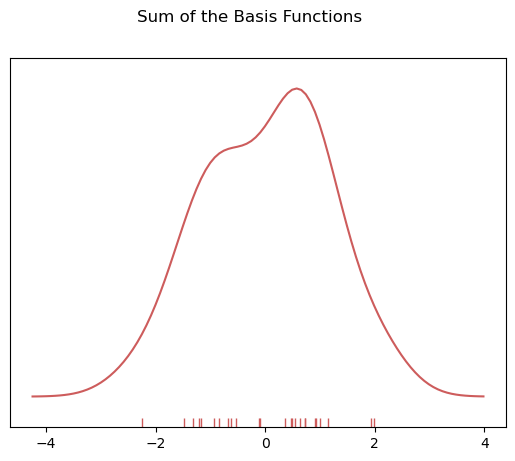

In [70]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

# Categorical Plots

In [110]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [96]:
import numpy as np

<Axes: xlabel='sex', ylabel='total_bill'>

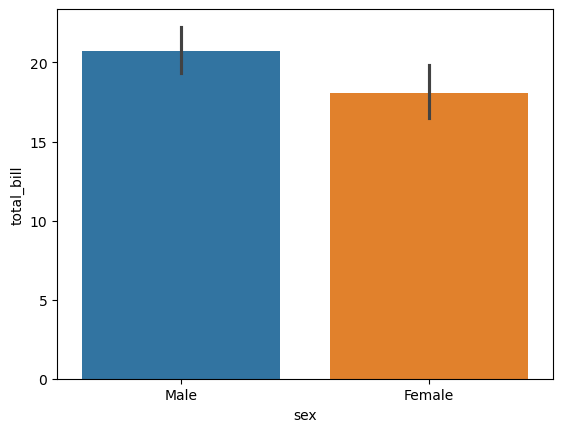

In [108]:
sns.barplot(data=tips,x='sex',y='total_bill',hue='sex',estimator=np.mean)

<Axes: xlabel='day', ylabel='total_bill'>

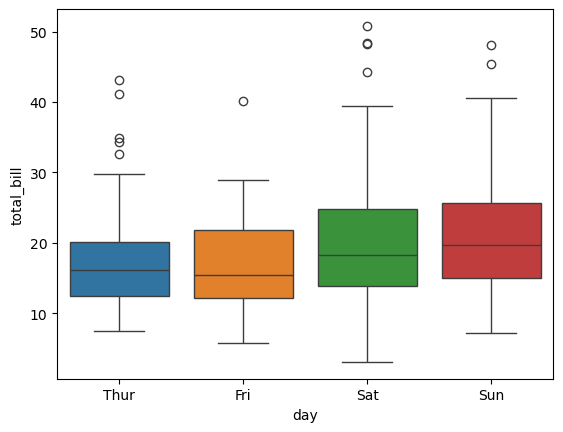

In [165]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='day')

<Axes: xlabel='day', ylabel='total_bill'>

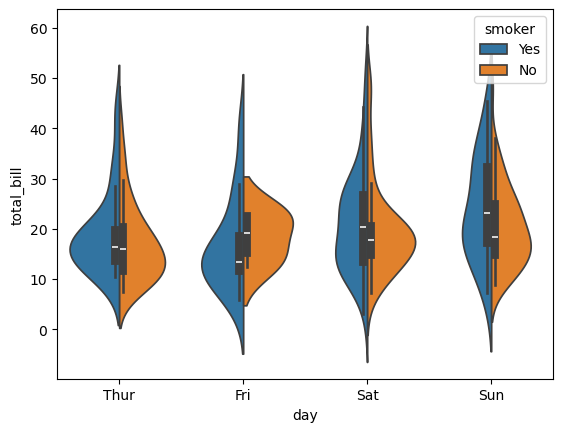

In [163]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

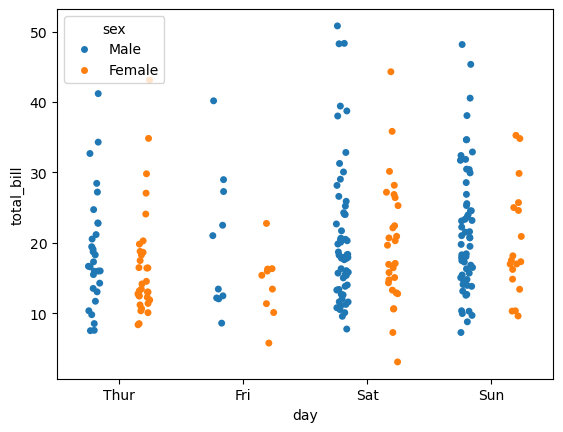

In [177]:
sns.stripplot(x='day',y='total_bill',data=tips,dodge=True,hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

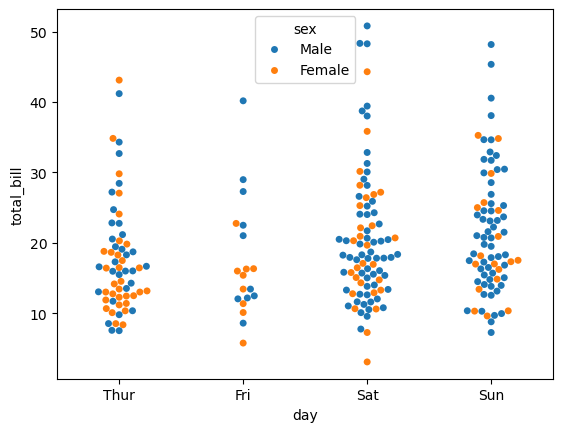

In [187]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex')

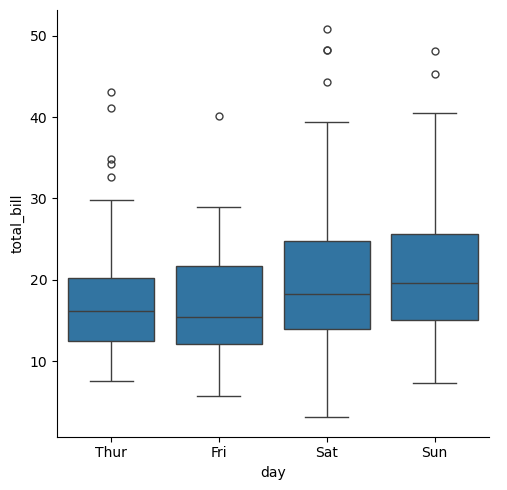

In [201]:
sns.catplot(x='day',y='total_bill',data=tips,kind='box')

In [203]:
flights=sns.load_dataset('flights')

In [205]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [225]:
tips = sns.load_dataset('tips')

# Select only the numerical columns
numerical_tips = tips.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
a = numerical_tips.corr()
a

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

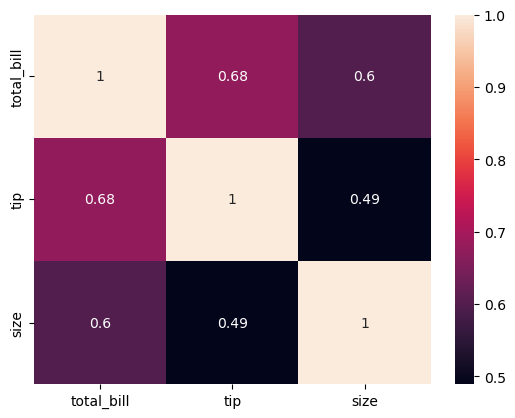

In [231]:
sns.heatmap(a,annot=True)

In [235]:
a=flights.pivot_table(index='month',columns='year',values='passengers')

C:\Users\Phantom\AppData\Local\Temp\ipykernel_20632\871010451.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  a=flights.pivot_table(index='month',columns='year',values='passengers')


<Axes: xlabel='year', ylabel='month'>

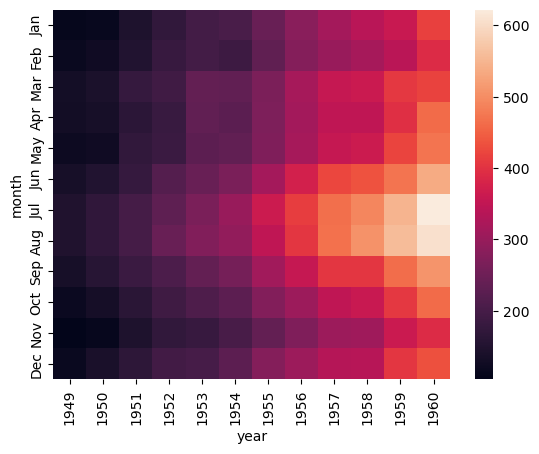

In [251]:
sns.heatmap(a)

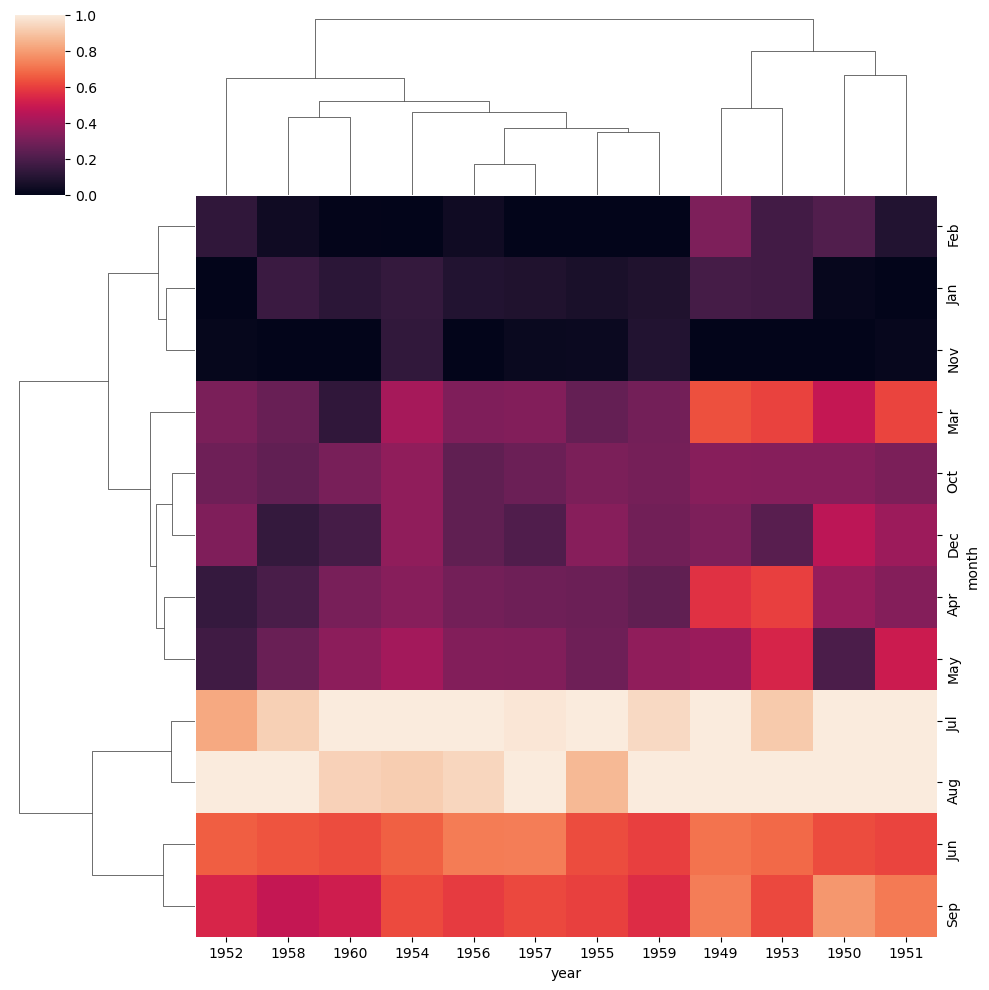

In [257]:
sns.clustermap(a,standard_scale=1)

In [259]:
iris=sns.load_dataset('iris')

In [261]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


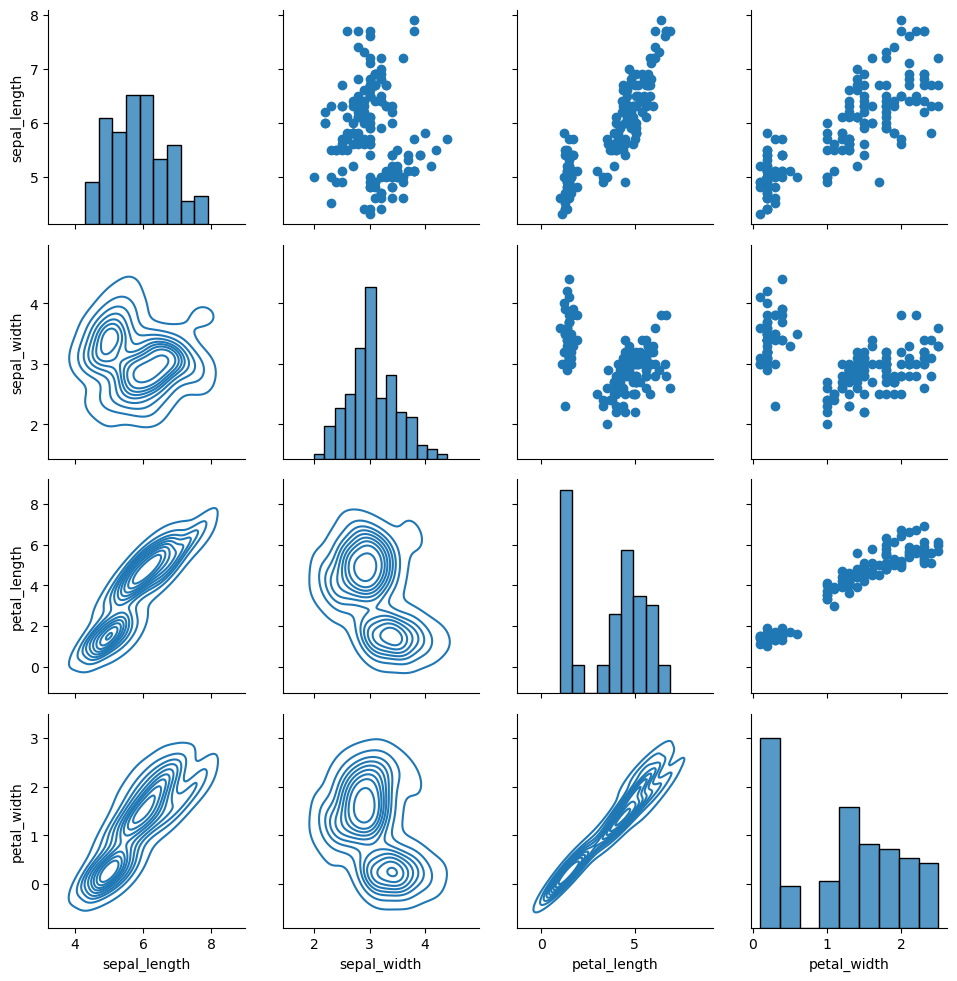

In [287]:
g=sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [289]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Phantom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Phantom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Phantom\anaconda3

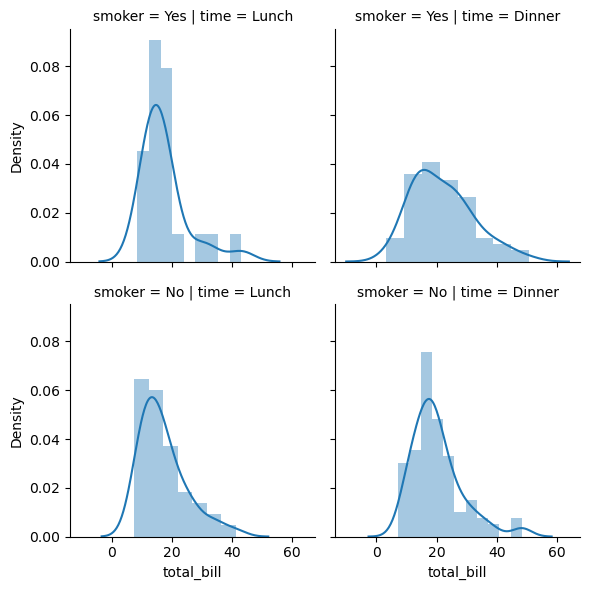

In [297]:
g=sns.FacetGrid(data=tips,row='smoker',col='time')
g.map(sns.distplot,'total_bill')

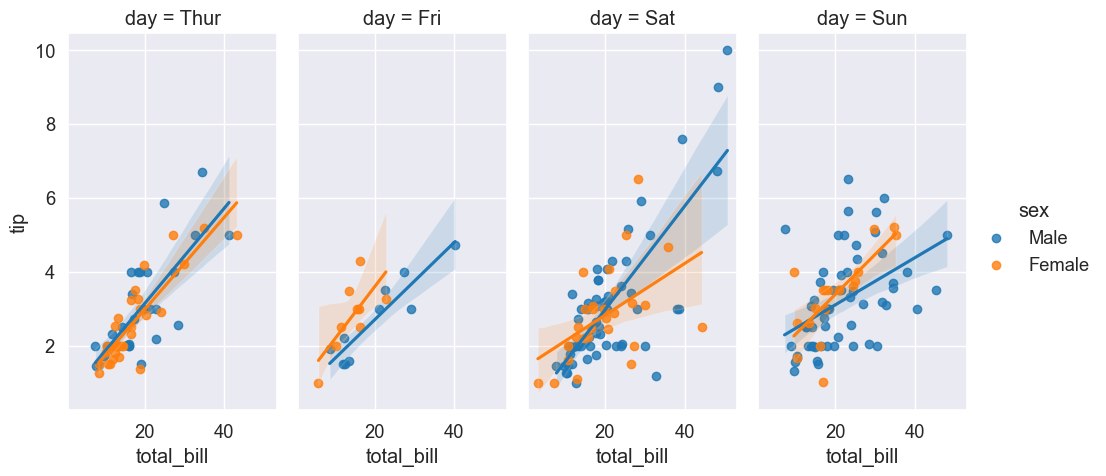

In [353]:
sns.set_style('darkgrid')
sns.set_context('notebook',font_scale=1.2)
a=sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',col='day',aspect=0.5)
sns.despine(left=False,right=False,top=False)